In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("payment_fraud.csv")

In [3]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
data.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([14784.,  2708.,  2092.,  1751.,  2311.,  1250.,  1464.,  1354.,
         1661.,  9846.]),
 array([1.0000e+00, 2.0090e+02, 4.0080e+02, 6.0070e+02, 8.0060e+02,
        1.0005e+03, 1.2004e+03, 1.4003e+03, 1.6002e+03, 1.8001e+03,
        2.0000e+03]),
 <BarContainer object of 10 artists>)

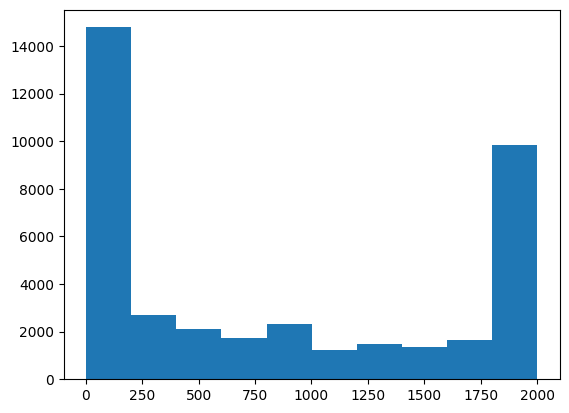

In [6]:
plt.hist(data['accountAgeDays'])

<Axes: xlabel='paymentMethod', ylabel='count'>

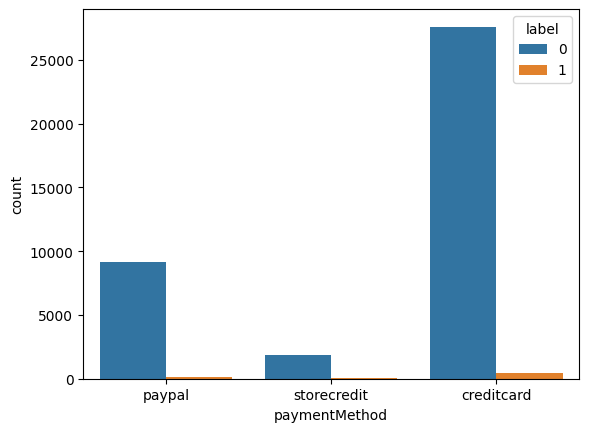

In [7]:
sns.countplot(data=data,x="paymentMethod",hue="label")

In [8]:
data['label'].value_counts()

label
0    38661
1      560
Name: count, dtype: int64

In [9]:
data.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [11]:
data[data['accountAgeDays']<data['paymentMethodAgeDays']]

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label


In [12]:
#label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder 

In [14]:
le=LabelEncoder()

In [15]:
le.fit_transform(data['paymentMethod'])
data['paymentMethod']=le.fit_transform(data['paymentMethod'])

In [16]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,1,28.204861,0
1,725,1,4.742303,2,0.000000,0
2,845,1,4.921318,0,0.000000,0
3,503,1,4.886641,0,0.000000,0
4,2000,1,5.040929,0,0.000000,0


In [18]:
#our data is inbalance so we are using sor t method to balance the data
#smote standas for synthetic minority over sapmling technic

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote=SMOTE()

In [21]:
x_resample,y_resample=smote.fit_resample(data.iloc[:,:-1],data.iloc[:,-1])

In [22]:
y_resample.value_counts()

label
0    38661
1    38661
Name: count, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.25)

In [24]:
# for classification we can use algorithm (method :- random forest, knn )

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier()

In [27]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
y_pred=model.predict(x_test)

In [29]:
from sklearn.metrics import  classification_report, confusion_matrix

In [30]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9662
           1       1.00      1.00      1.00      9669

    accuracy                           1.00     19331
   macro avg       1.00      1.00      1.00     19331
weighted avg       1.00      1.00      1.00     19331



In [31]:
confusion_matrix(y_test,y_pred)


array([[9662,    0],
       [   0, 9669]], dtype=int64)